In [4]:
# !pip install yfinance
# !pip install matplotlib
# !pip install pandas
# !pip install scikit-learn
# !pip install keras
# !pip install tensorflow
# !pip install distutils
# !pip install keras

In [5]:
import yfinance as yf

In [6]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

In [7]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-23,27.681499,28.172651,27.636623,28.170158,28.138138,30736155
2014-06-24,28.182125,28.553905,27.973698,28.153704,28.121702,44142862
2014-06-25,28.185616,28.918604,28.183622,28.853283,28.820486,39387843
2014-06-26,28.970463,29.042763,28.514214,28.721146,28.688499,34839390
2014-06-27,28.779985,28.914116,28.611446,28.782976,28.750259,44738493


In [9]:
google_data.shape

(2517, 6)

In [10]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,75.031556,75.834177,74.296329,75.087349,75.002724,3.165936e+07
std,40.516148,40.988019,40.107416,40.559390,40.515128,1.538350e+07
min,24.664783,24.730902,24.311253,24.560070,24.532154,6.936000e+06
25%,39.763000,40.042801,39.526001,39.767502,39.722301,2.198600e+07
50%,59.657501,60.067501,59.180149,59.660000,59.592186,2.787200e+07
75%,108.899498,111.370003,107.614998,109.419998,109.295624,3.644800e+07
max,179.750000,182.511993,178.059998,180.259995,180.259995,2.232980e+08


In [11]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-06-23 to 2024-06-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [12]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google stocks')

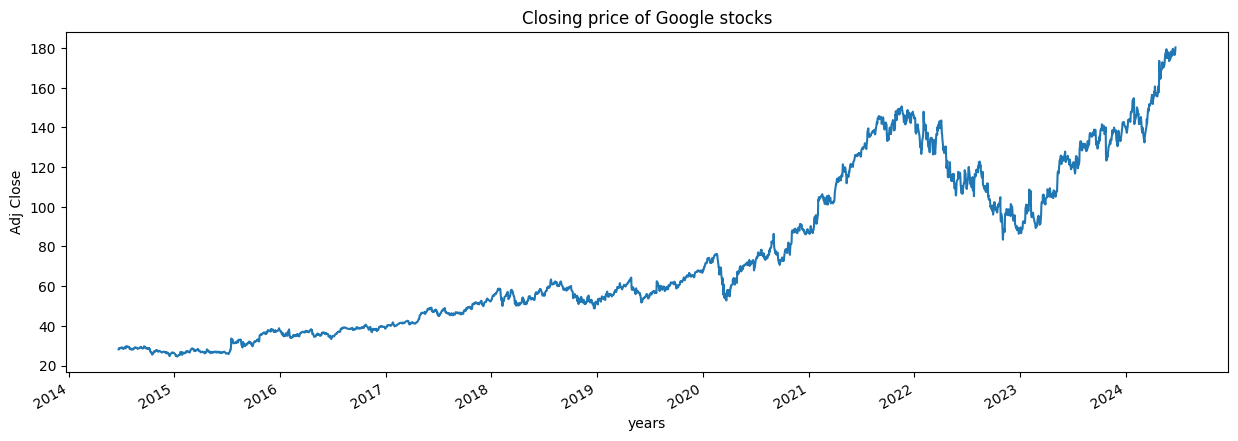

In [14]:
plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google stocks")

In [15]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize= figsize)
    values.plot()
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google stocks")

In [16]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

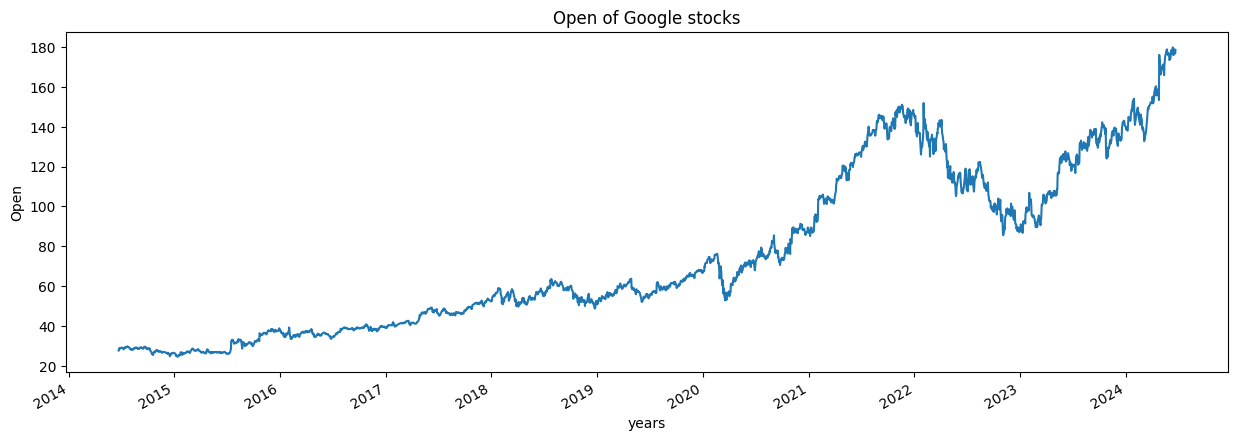

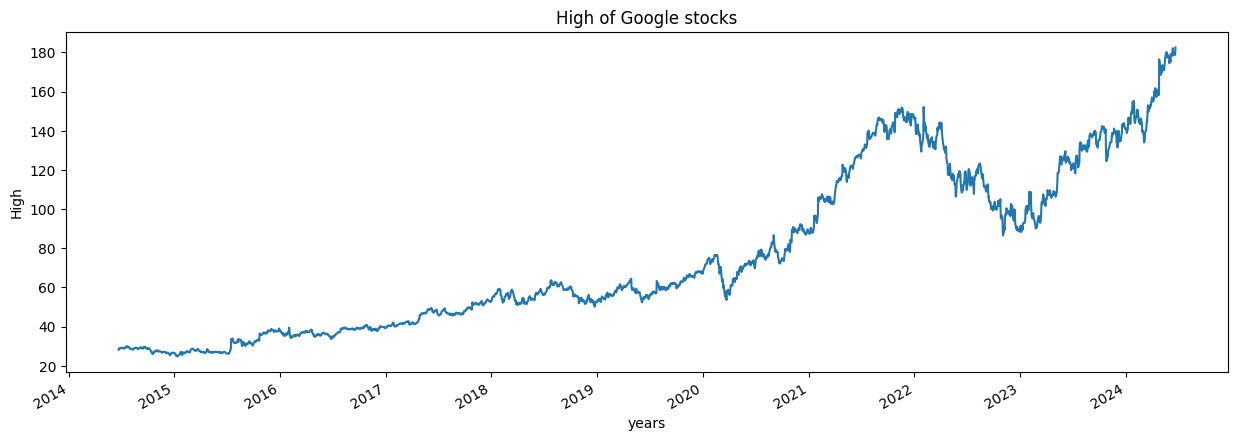

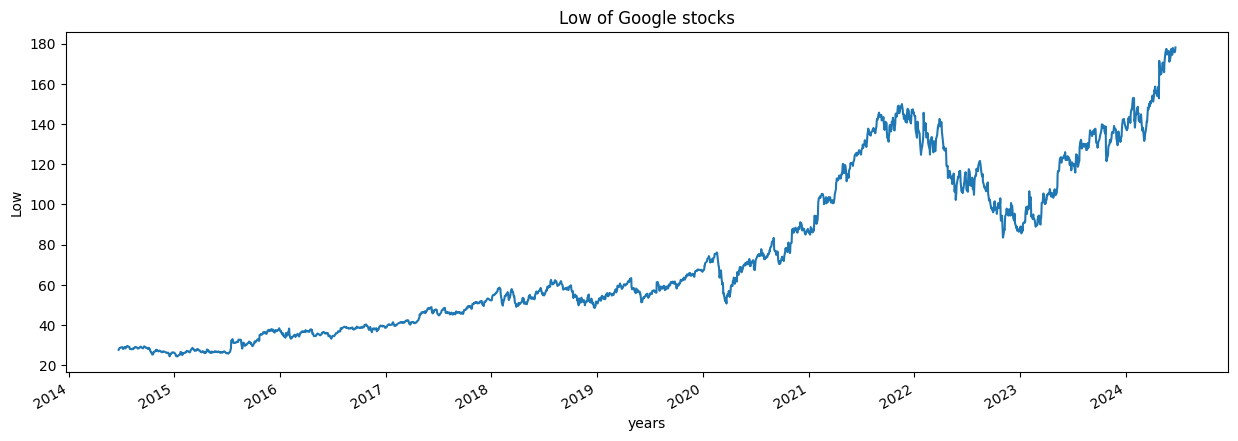

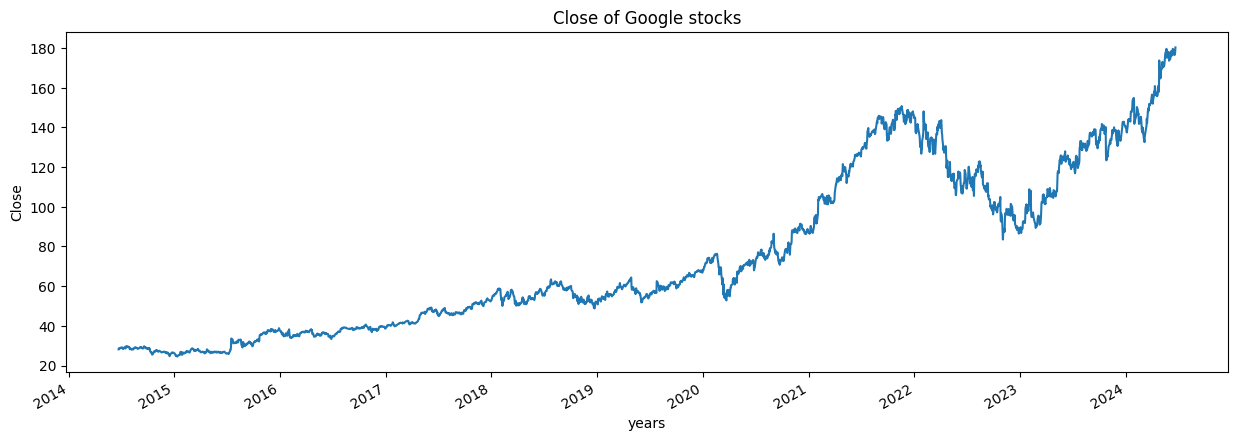

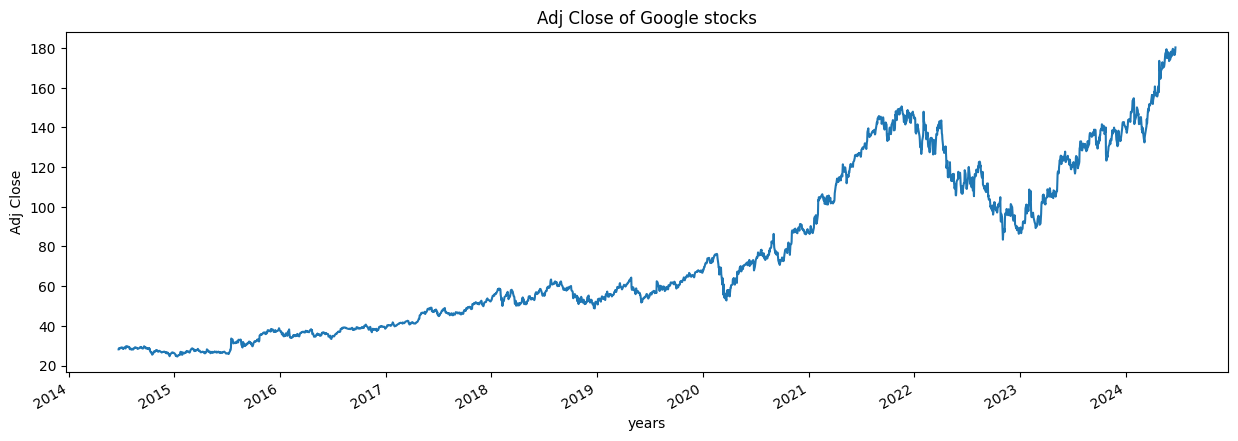

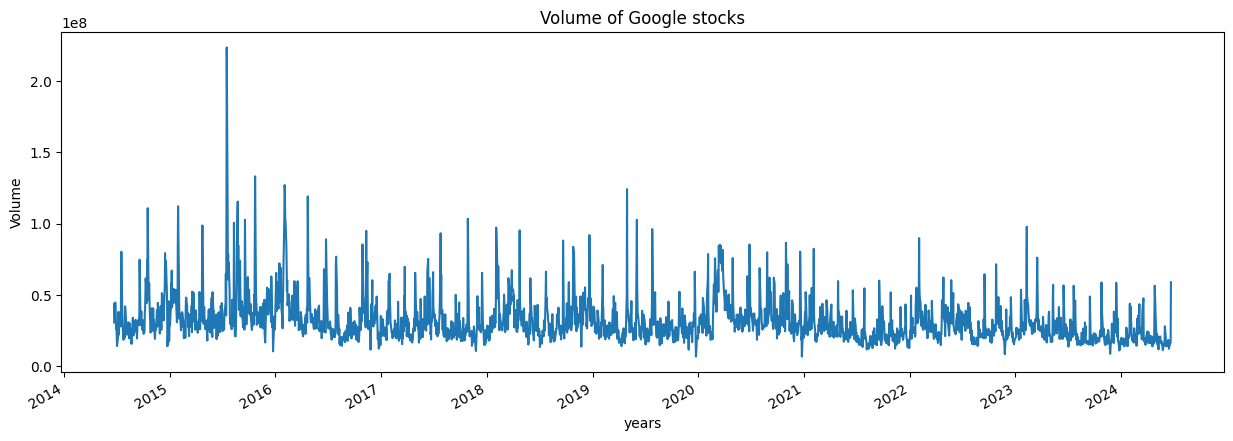

In [17]:
for column in google_data.columns:
    plot_graph((15, 5), google_data[column], column)

In [18]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [19]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [20]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [21]:
for i in range(2004, 2025):
    print(i, list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 134
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 119


In [22]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [23]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-06-12         NaN
2015-06-15         NaN
2015-06-16         NaN
2015-06-17         NaN
2015-06-18    27.36316
Name: MA_for_250_days, dtype: float64

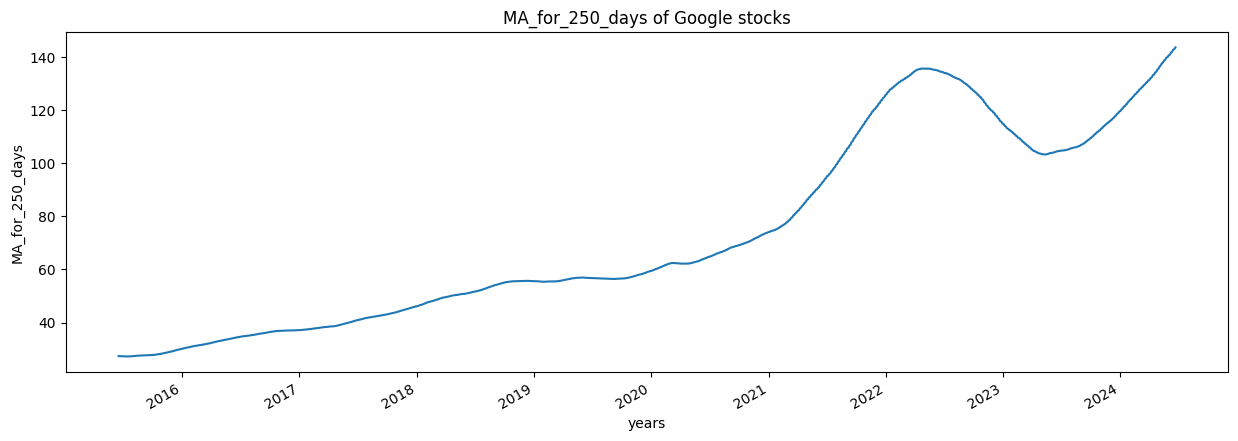

In [24]:
plot_graph((15, 5), google_data['MA_for_250_days'], "MA_for_250_days")

<Figure size 1500x500 with 0 Axes>

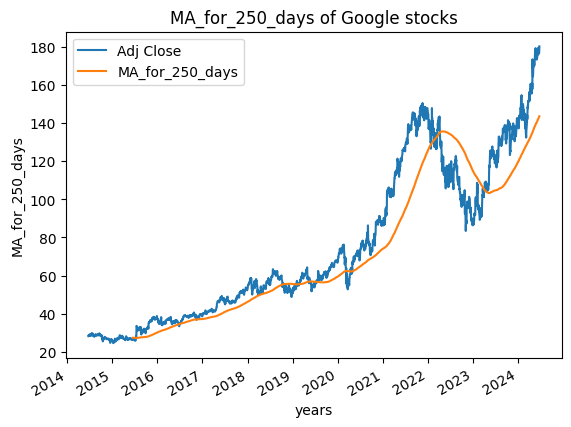

In [25]:
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_250_days']], "MA_for_250_days")

<Figure size 1500x500 with 0 Axes>

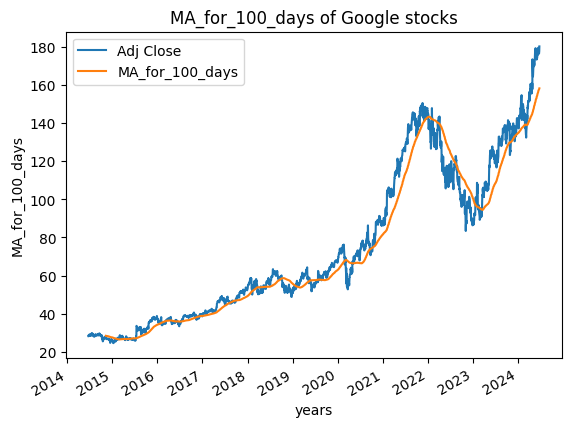

In [26]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days']], "MA_for_100_days")

<Figure size 1500x500 with 0 Axes>

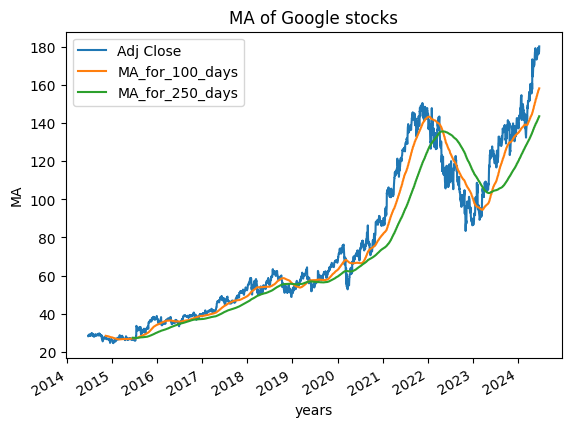

In [27]:
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

In [28]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-06-23,28.138138,NaN
2014-06-24,28.121702,-0.000584
2014-06-25,28.820486,0.024849
2014-06-26,28.688499,-0.004580
2014-06-27,28.750259,0.002153


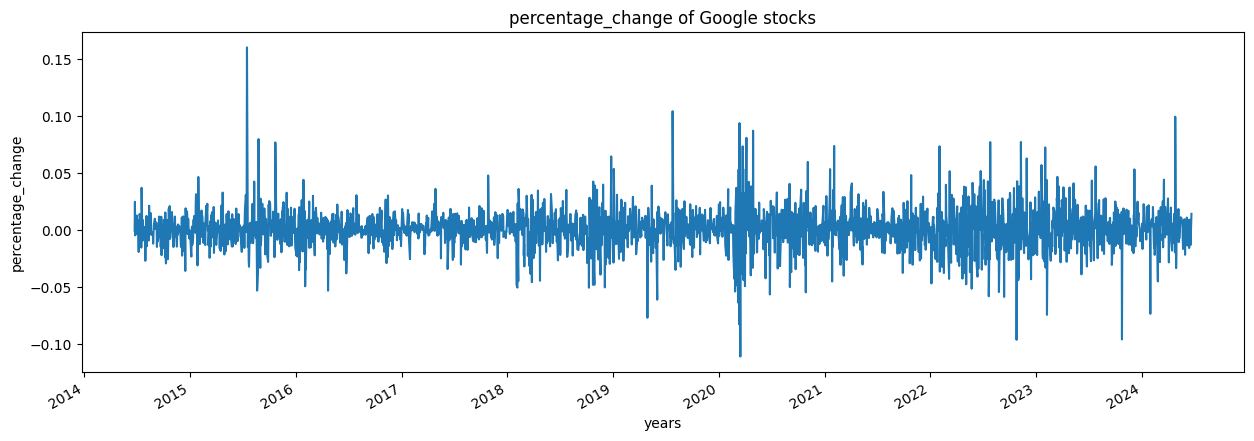

In [29]:
plot_graph((15, 5), google_data['percentage_change_cp'], 'percentage_change')

In [30]:
Adj_close_price = google_data[['Adj Close']]

In [31]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([180.25999451]), array([24.53215408]))

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02315568],
       [0.02305014],
       [0.02753735],
       ...,
       [0.97553426],
       [0.98362536],
       [1.        ]])

In [33]:
len(scaled_data)

2517

In [34]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [35]:
x_data[0], y_data[0]

(array([[0.02315568],
        [0.02305014],
        [0.02753735],
        [0.0266898 ],
        [0.02708639],
        [0.02645953],
        [0.02882308],
        [0.02871593],
        [0.02948192],
        [0.02868873],
        [0.02511944],
        [0.0267154 ],
        [0.02512264],
        [0.02770686],
        [0.02952669],
        [0.02949791],
        [0.02881987],
        [0.02596379],
        [0.03279217],
        [0.03099791],
        [0.03268342],
        [0.03308001],
        [0.03223885],
        [0.03085399],
        [0.03135931],
        [0.02976337],
        [0.03034227],
        [0.02528255],
        [0.02351389],
        [0.0257783 ],
        [0.02319406],
        [0.02361112],
        [0.02264715],
        [0.02437744],
        [0.02409278],
        [0.02244566],
        [0.02629961],
        [0.02625804],
        [0.02588384],
        [0.02865996],
        [0.03016315],
        [0.02940516],
        [0.02904695],
        [0.02878789],
        [0.02803309],
        [0

In [36]:
int(len(x_data)*0.7)

1691

In [37]:
4908-100-int(len(x_data)*0.7)

3117

In [38]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1691, 100, 1)
(1691, 1)
(726, 100, 1)
(726, 1)


In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [41]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - loss: 0.0013
Epoch 2/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - loss: 4.5853e-04


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         3,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,187 (2.30 MB)

 Trainable params: 201,395 (786.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 402,792 (1.54 MB)

In [45]:
predictions = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [46]:
predictions

array([[0.7236082 ],
       [0.72377765],
       [0.723838  ],
       [0.7260197 ],
       [0.72820324],
       [0.7318875 ],
       [0.73486626],
       [0.7357436 ],
       [0.73741806],
       [0.7386927 ],
       [0.74058986],
       [0.73828906],
       [0.73419666],
       [0.731879  ],
       [0.7342396 ],
       [0.7429388 ],
       [0.7530557 ],
       [0.76126415],
       [0.7642552 ],
       [0.7704463 ],
       [0.7771325 ],
       [0.7815257 ],
       [0.78467673],
       [0.7826849 ],
       [0.7814686 ],
       [0.7824914 ],
       [0.7822507 ],
       [0.7819569 ],
       [0.77499986],
       [0.7725588 ],
       [0.7718455 ],
       [0.7759805 ],
       [0.77794534],
       [0.7722188 ],
       [0.76122296],
       [0.7542582 ],
       [0.75355357],
       [0.7566316 ],
       [0.7614492 ],
       [0.7624715 ],
       [0.7502237 ],
       [0.7354399 ],
       [0.72224873],
       [0.72128344],
       [0.7174114 ],
       [0.71992654],
       [0.7257178 ],
       [0.734

In [47]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[137.2181  ],
       [137.24448 ],
       [137.25388 ],
       [137.59363 ],
       [137.93367 ],
       [138.50742 ],
       [138.97128 ],
       [139.10791 ],
       [139.36867 ],
       [139.56717 ],
       [139.86261 ],
       [139.50432 ],
       [138.86702 ],
       [138.50609 ],
       [138.8737  ],
       [140.22841 ],
       [141.8039  ],
       [143.08217 ],
       [143.54797 ],
       [144.51208 ],
       [145.55331 ],
       [146.23746 ],
       [146.72816 ],
       [146.41798 ],
       [146.22856 ],
       [146.38785 ],
       [146.35036 ],
       [146.30461 ],
       [145.2212  ],
       [144.84106 ],
       [144.72998 ],
       [145.37392 ],
       [145.6799  ],
       [144.78812 ],
       [143.07576 ],
       [141.99115 ],
       [141.88142 ],
       [142.36076 ],
       [143.111   ],
       [143.27019 ],
       [141.36287 ],
       [139.06062 ],
       [137.0064  ],
       [136.85606 ],
       [136.25308 ],
       [136.64476 ],
       [137.54662 ],
       [138.9

In [48]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[136.12509155],
       [135.87388611],
       [136.78434753],
       [136.88023376],
       [137.84513855],
       [137.93952942],
       [137.5329895 ],
       [138.23219299],
       [138.24868774],
       [138.75810242],
       [137.1444397 ],
       [136.41477966],
       [136.75787354],
       [138.27964783],
       [140.93911743],
       [142.2366333 ],
       [142.7875061 ],
       [141.9614563 ],
       [144.38619995],
       [145.30415344],
       [145.29666138],
       [145.67622375],
       [144.05506897],
       [144.61042786],
       [145.35359192],
       [144.71881104],
       [144.7487793 ],
       [141.75968933],
       [143.30192566],
       [143.24299622],
       [145.04093933],
       [144.20939636],
       [141.30270386],
       [138.85897827],
       [139.48776245],
       [140.77830505],
       [141.66529846],
       [142.47087097],
       [141.34016418],
       [136.02920532],
       [134.36808777],
       [133.11402893],
       [136.30738831],
       [133

In [53]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))


In [54]:
rmse

3.2317897926264805

In [55]:
ploting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    } , 
    index=google_data.index[splitting_len+100:] 
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-08-03,136.125092,137.218094
2021-08-04,135.873886,137.244476
2021-08-05,136.784348,137.253876
2021-08-06,136.880234,137.593628
2021-08-09,137.845139,137.933670


<Figure size 1500x600 with 0 Axes>

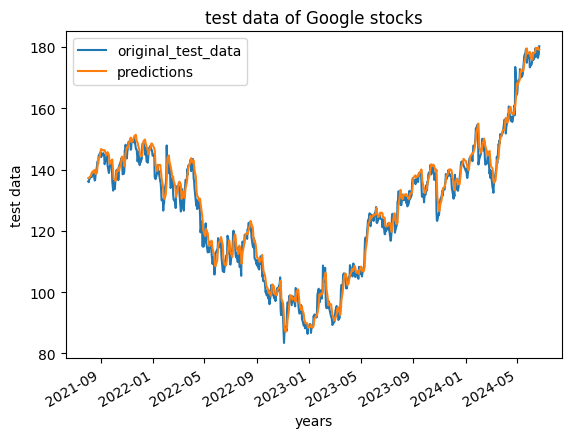

In [56]:
plot_graph((15, 6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

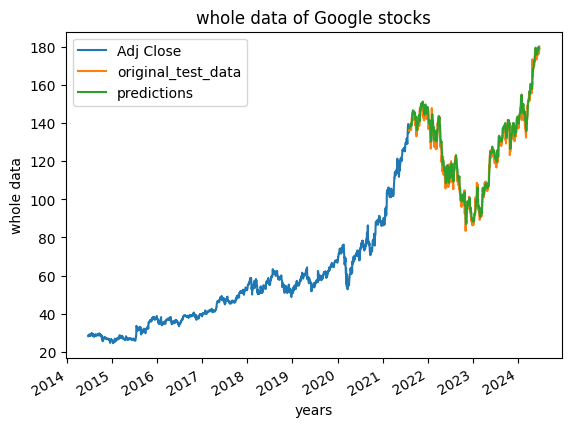

In [57]:
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len + 100], ploting_data], axis=0), 'whole data')

In [58]:
model.save('Latest_stock_price_model.keras')